In [212]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [213]:
df=pd.read_csv("raw_diabetes.csv")

In [214]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [215]:
df.shape

(768, 9)

In [216]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [218]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [219]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [220]:
x=df.drop(columns="Outcome")

In [221]:
y=df.Outcome

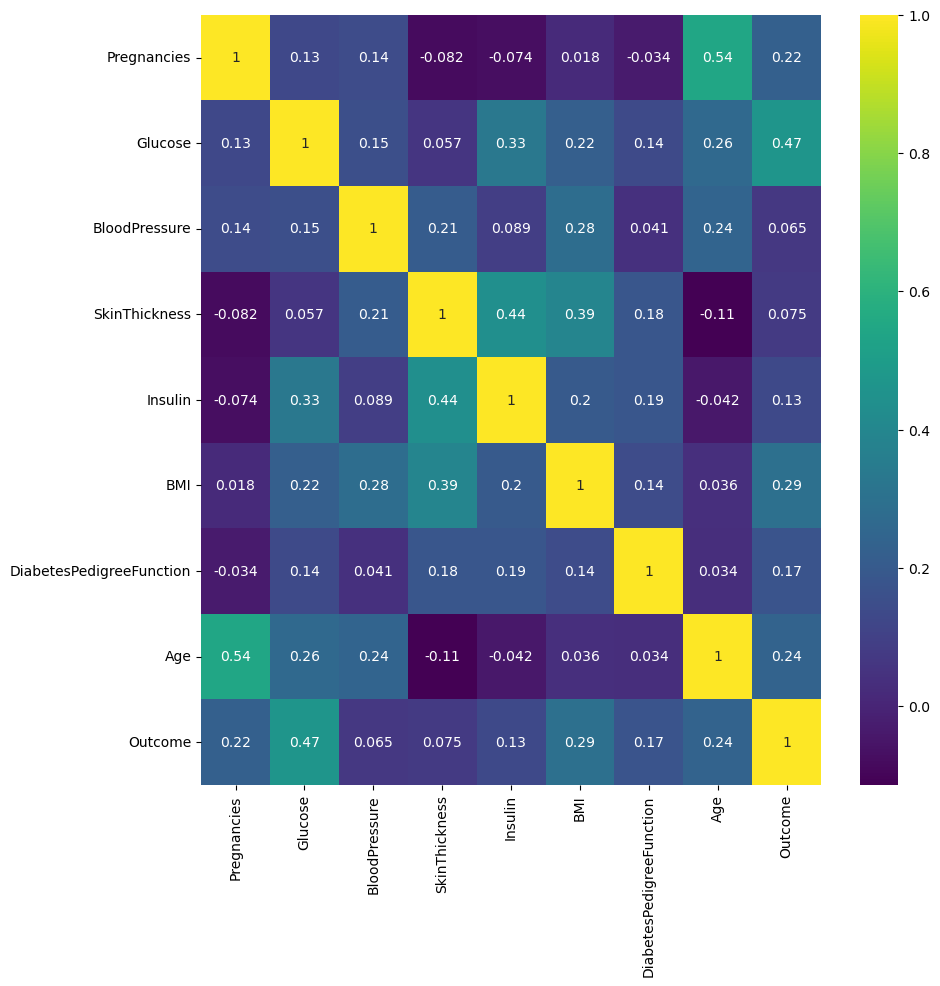

In [222]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()    #we can see here there is very low correlation between bloodpressure , skinthickness and the outcome

<Axes: >

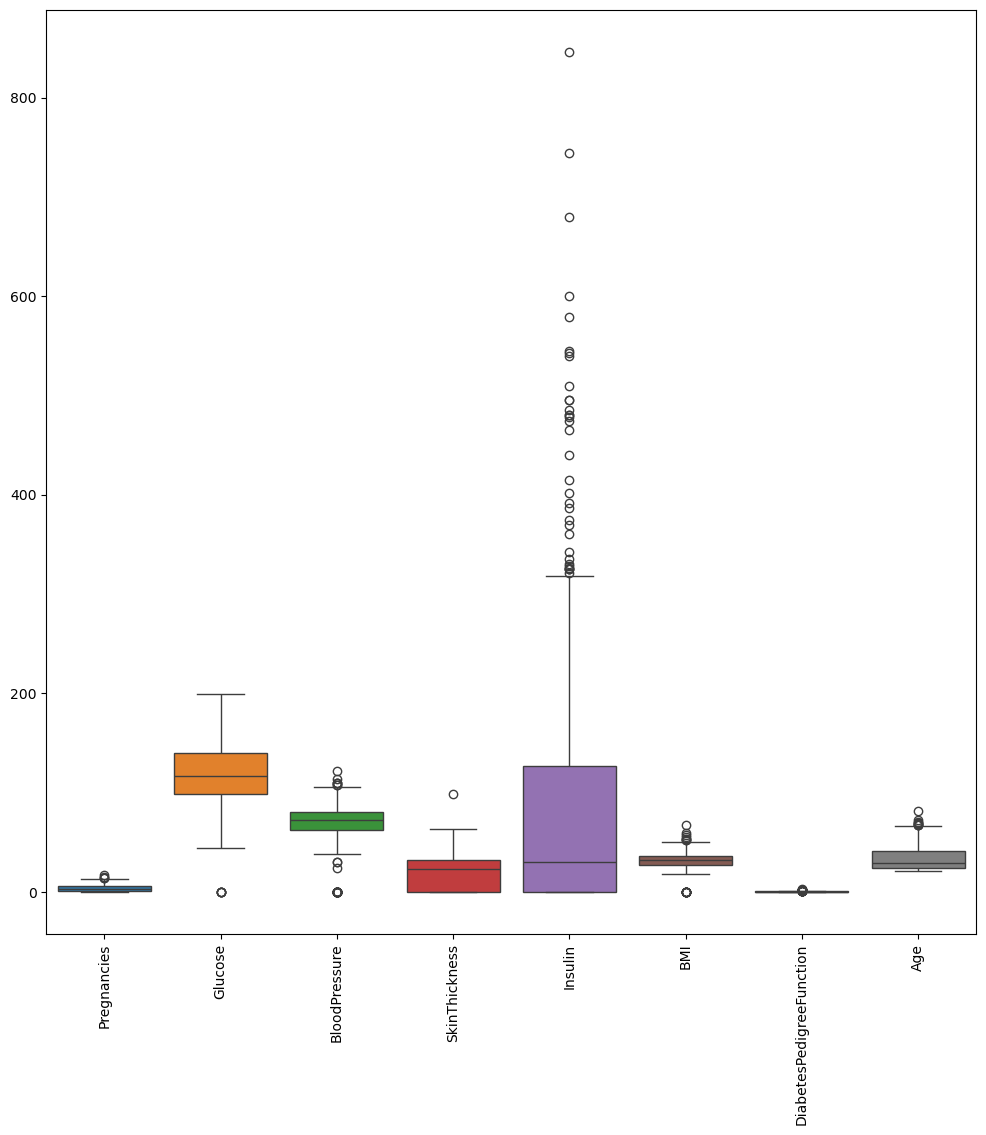

In [223]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.boxplot(x)

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
scale=StandardScaler()

In [226]:
scale.fit(x)

StandardScaler()

In [227]:
x_scaled=scale.fit_transform(x)

In [228]:
cols=[i for i in x]

In [229]:
for i in cols:
    scaled_dataframe=pd.DataFrame(x_scaled,columns=cols)

In [230]:
scaled_dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


<Axes: >

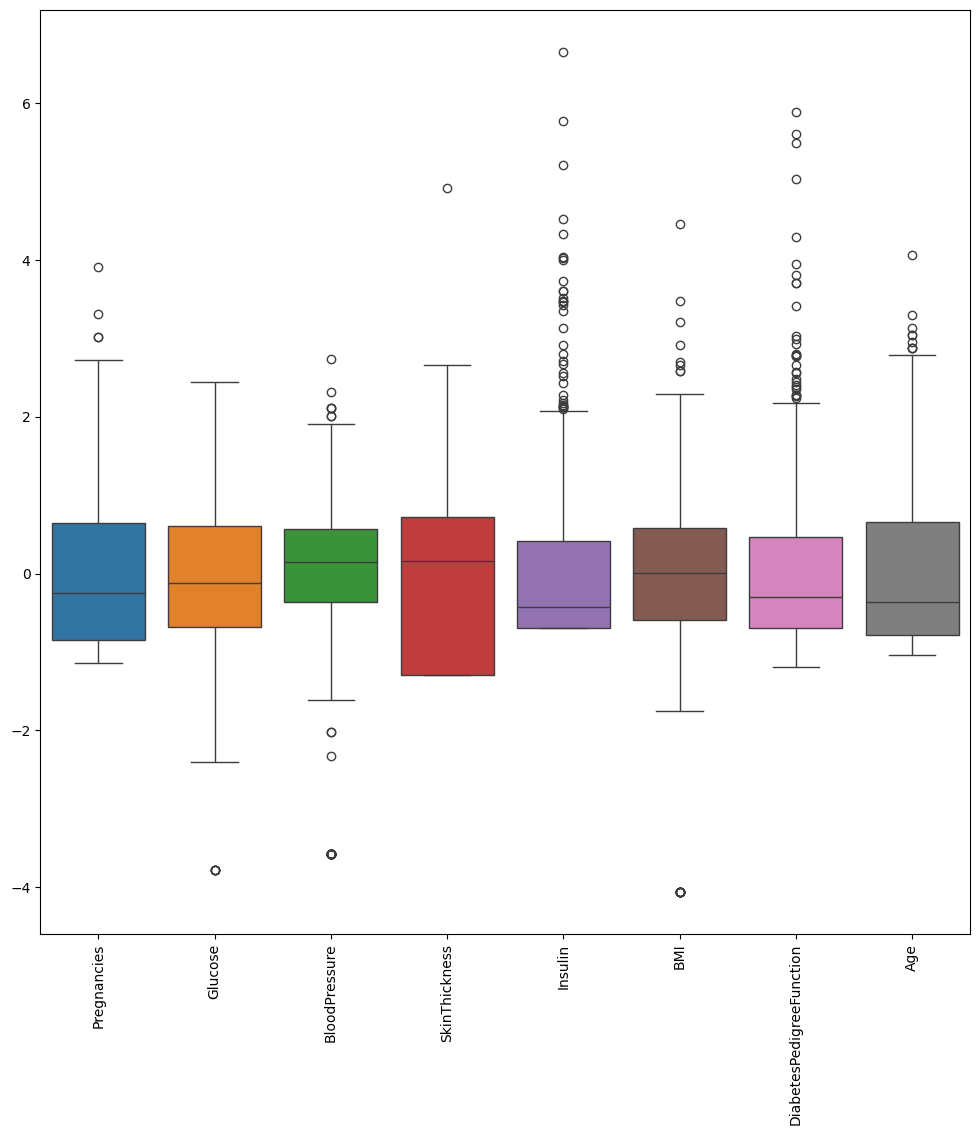

In [231]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.boxplot(scaled_dataframe)

In [232]:
for i in scaled_dataframe:
    Q1=(np.percentile(scaled_dataframe[i],(25)))
    Q3=(np.percentile(scaled_dataframe[i],(75)))
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    upper_fence=Q3+(1.5*IQR)
    scaled_dataframe[i] = scaled_dataframe[i].apply(
        lambda x: np.nan if x < lower_fence or x > upper_fence else x
    )

In [233]:
scaled_dataframe=scaled_dataframe.fillna(scaled_dataframe.mean())

<Axes: >

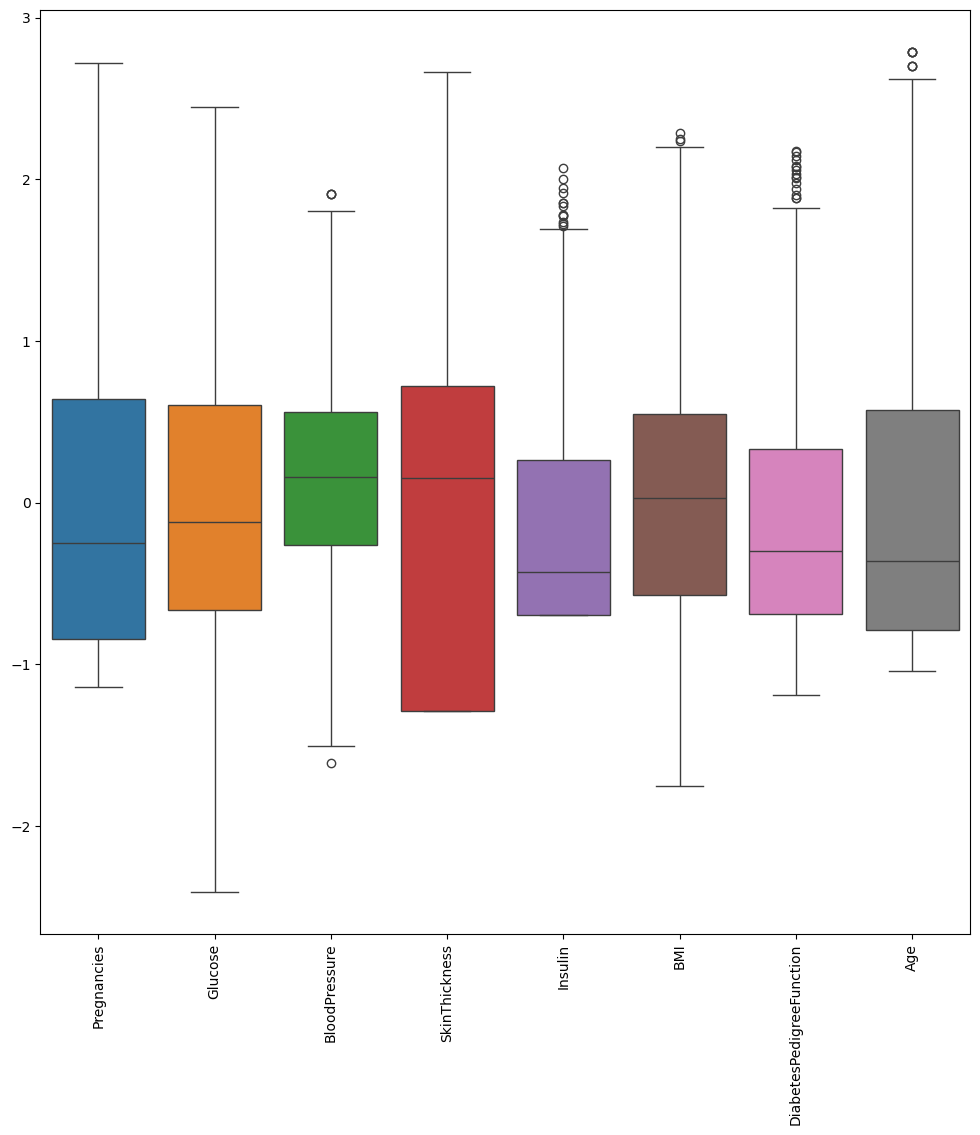

In [234]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.boxplot(scaled_dataframe)

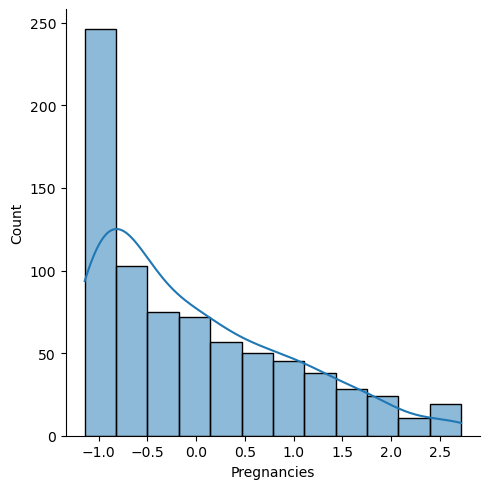

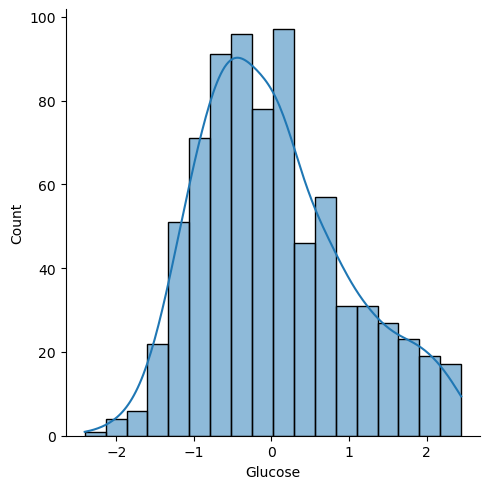

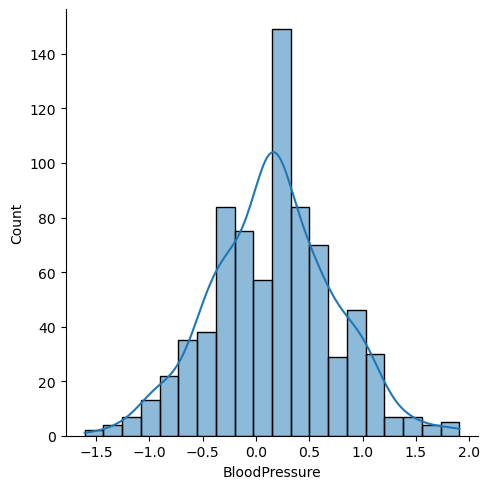

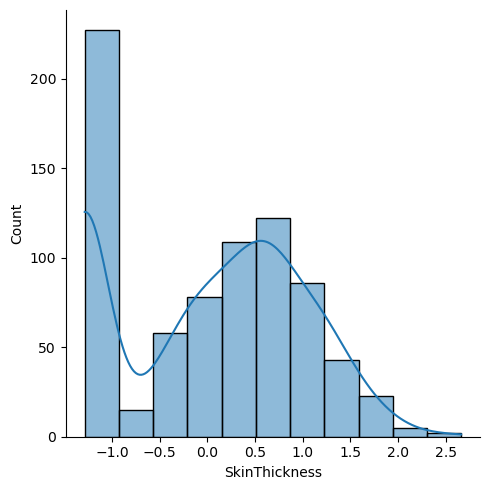

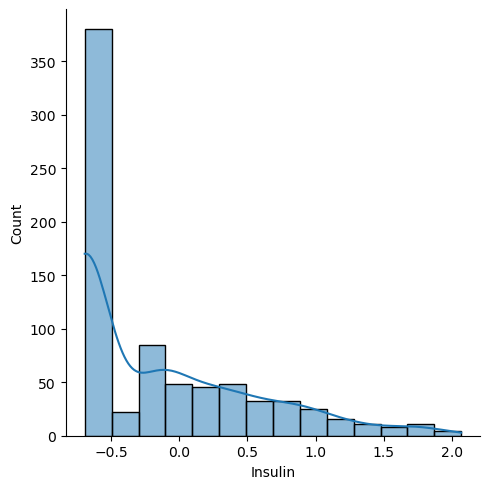

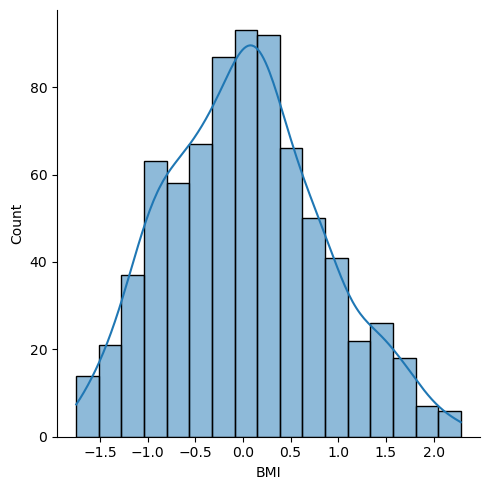

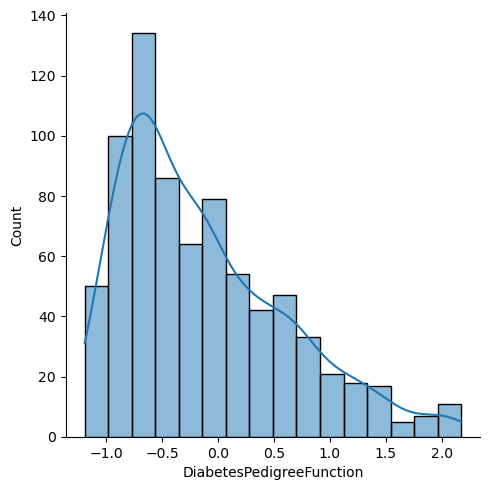

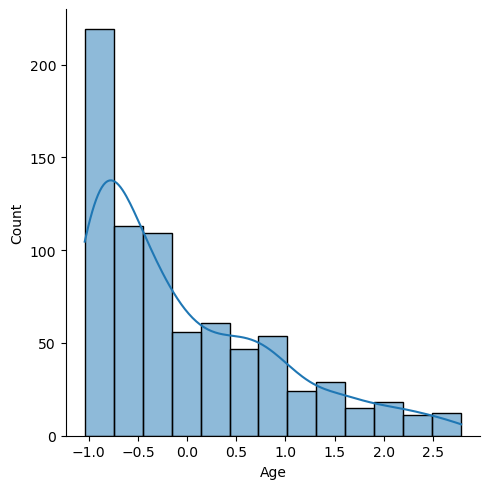

In [240]:
for i in scaled_dataframe:
    sns.displot(scaled_dataframe[i],kde=True)

In [247]:
scaled_dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,-0.126978,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [244]:
from sklearn.model_selection import train_test_split

In [250]:
x_train,x_test,y_train,y_test=train_test_split(scaled_dataframe,y,test_size=.2,random_state=2)

In [257]:
from imblearn.over_sampling import SMOTE

In [258]:
smote=SMOTE(random_state=2)

In [261]:
x_train,y_train=smote.fit_resample(x_train,y_train)

In [262]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.844885,0.097192,0.253036,0.969998,-0.692891,-0.532119,-1.123111,-0.275760
1,-0.844885,-0.810425,0.666618,0.279989,0.870031,0.381700,-0.721435,0.830381
2,-1.141852,-0.841722,0.046245,0.405445,0.305642,1.460513,-0.377141,-1.041549
3,0.936914,1.975021,0.770014,0.781814,-0.692891,0.445159,-0.352980,0.660206
4,-1.141852,-1.498962,0.160438,-1.288212,-0.692891,-1.382478,-0.392242,-0.701198
...,...,...,...,...,...,...,...,...
777,-1.141852,0.351643,-0.227966,0.318145,0.823410,0.025484,0.002957,-0.841769
778,0.046014,1.130536,0.462907,-1.288212,-0.692891,0.112901,0.976018,-0.200808
779,-1.141852,0.408155,0.189753,1.691101,0.396925,0.026834,-0.262948,-0.628837
780,-0.250952,-1.048989,0.571269,0.641896,-0.225214,0.204087,-0.289093,-0.570256


In [274]:
y_train

0      0
1      1
2      0
3      1
4      0
      ..
777    1
778    1
779    1
780    1
781    1
Name: Outcome, Length: 782, dtype: int64

In [265]:
y_train.value_counts()

Outcome
0    391
1    391
Name: count, dtype: int64

In [267]:
x_train.shape

(782, 8)

In [272]:
train_set=pd.concat([x_train,y_train],axis=1)

In [273]:
train_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.844885,0.097192,0.253036,0.969998,-0.692891,-0.532119,-1.123111,-0.275760,0
1,-0.844885,-0.810425,0.666618,0.279989,0.870031,0.381700,-0.721435,0.830381,1
2,-1.141852,-0.841722,0.046245,0.405445,0.305642,1.460513,-0.377141,-1.041549,0
3,0.936914,1.975021,0.770014,0.781814,-0.692891,0.445159,-0.352980,0.660206,1
4,-1.141852,-1.498962,0.160438,-1.288212,-0.692891,-1.382478,-0.392242,-0.701198,0
...,...,...,...,...,...,...,...,...,...
777,-1.141852,0.351643,-0.227966,0.318145,0.823410,0.025484,0.002957,-0.841769,1
778,0.046014,1.130536,0.462907,-1.288212,-0.692891,0.112901,0.976018,-0.200808,1
779,-1.141852,0.408155,0.189753,1.691101,0.396925,0.026834,-0.262948,-0.628837,1
780,-0.250952,-1.048989,0.571269,0.641896,-0.225214,0.204087,-0.289093,-0.570256,1


In [281]:
train_set.to_csv("train_set.csv",index=False)

In [277]:
test_set=pd.concat([x_test,y_test],axis=1)

In [282]:
test_set.to_csv("test_set.csv",index=False)